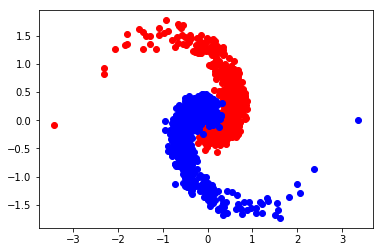

In [8]:
import random
from math import *
from pylab import *
import numpy as np

n=1000 #number of points

a=0.5
b=0.6

th=np.random.randn(n)

# Data creation
x=a*exp(b*th)*cos(th)
y=a*exp(b*th)*sin(th)

x1=a*exp(b*(th))*cos(th+pi)
y1=a*exp(b*(th))*sin(th+pi)

sx=np.random.normal(0, a*0.25, n)
sy=np.random.normal(0, a*0.25, n)
plot(x+sy,y+sx,"ro")
plot(x1+sx, y1+sy,"bo")

show()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import math

df = pd.read_csv('data3.csv')
df.head()

,X1,X2,Y
0,34,95,0
1,90,7,0
2,72,51,1
3,51,15,1
4,27,94,0


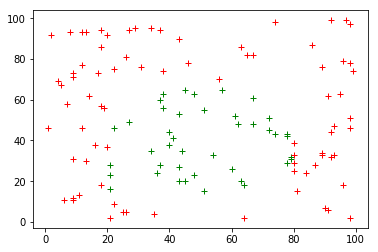

In [3]:
X1 = df["X1"].values.tolist()
X2 = df["X2"].values.tolist()
label = df["Y"].values.tolist()

for i in range(len(label)):
    if label[i] == 0:
        plt.plot(X1[i], X2[i], "r+")
    else:
        plt.plot(X1[i], X2[i], "g+")

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
A = []
B = []
for i in range(len(X1)):
    A.append([X1[i], X2[i]])
    
for i in range(len(label)):
    B.append([label[i]])
    
X = np.array(A)
Y = np.array(B)

In [5]:
class NeuralNetworkWithReLU(object):
    def __init__(self):
        inputLayerNeurons = 2
        hiddenLayerNeurons = 25
        outLayerNeurons = 1
        
        self.learning_rate = 0.08
        self.W_HI = np.random.randn(inputLayerNeurons, hiddenLayerNeurons)
        self.W_OH = np.random.randn(hiddenLayerNeurons, outLayerNeurons)
        
    def ReLU(self, x, der=False):
        if der == True:
            return 0
        else:
            return abs(x) * (x > 0)
        
    def feedForward(self, X):
        hidden_input = np.dot(X, self.W_HI)
        self.hidden_output = self.ReLU(hidden_input)
        
        output_input = np.dot(self.hidden_output, self.W_OH)
        pred = self.ReLU(output_input)
        return pred
        
    def backPropagation(self, X, Y, pred):
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.ReLU(pred)
        
        hidden_error = output_delta.dot(self.W_OH.T)
        hidden_delta = self.learning_rate * hidden_error * self.ReLU(self.hidden_output)
        
        self.W_HI += X.T.dot(hidden_delta)
        self.W_OH += self.hidden_output.T.dot(output_delta)
        
    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X,Y,output)

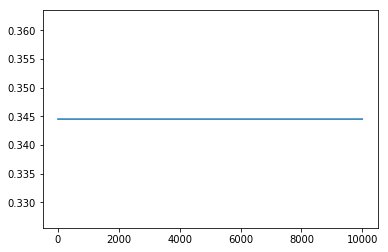

In [6]:
NN = NeuralNetworkWithReLU()

err = []
for i in range(10000):
    NN.train(X,Y)
    err.append(np.mean(np.square(Y - NN.feedForward(X))))

plt.plot(err)